## Parte 3 - Indução de Modelos e Avaliação.
Nesta parte será realizada a mineração de dados e a avaliação dos resultados da mineração, utilizando-se as técnicas ensinadas em sala, mas podendo explorar outras técnicas (principalmente se o conjunto de dados escolhido pelo aluno envolve a predição de variável numérica, caso de regressões). Também deverão ser utilizadas técnicas de avaliação de modelos para verificar a qualidade dos mesmos, como holdout e cross-validation. O número de modelos e tentativas de combinações fica por conta do proponente, no intuito de atingir modelos com a melhor qualidade possível. Estabelece-se o valor mínimo de 3 algoritmos de construção de modelos diferentes, com 5 configurações de parâmetros para cada um deles. Esta etapa deve apresentar um Notebook Jupyter ou um relatório em PDF contendo: a descrição da mineração de dados, a análise dos resultados, e a relevância e a justificativa dos resultados encontrados. 


<h1>Parte 3 - Indução de Modelos e Avaliação

<h2>Importanto bilbiotecas

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm

<h3><li> Lendo os Dados Pré-Processados 

In [0]:
import pandas as pd

url='https://raw.githubusercontent.com/AdrielGoulart/Breast-Cancer-Wisconsin-Diagnostic-Data-Set/master/Dados%20pre_processados.csv'

df = pd.read_csv(url,header = 0)
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,compactness_mean,concave points_mean
0,M,0.521037,0.545989,0.363733,0.27760,0.14710
1,M,0.643144,0.615783,0.501591,0.07864,0.07017
2,M,0.601496,0.595743,0.449417,0.15990,0.12790
3,M,0.210090,0.233501,0.102906,0.28390,0.10520
4,M,0.629893,0.630986,0.489290,0.13280,0.10430


<hr>

<h1 align='center'>Indução e Avaliação de Modelos

<h2>1 - Primeira combinação

<h4><li> Plotando Árvore de Decisão

In [0]:
model = DecisionTreeClassifier(criterion = 'entropy',random_state=1)
X = df.drop(['diagnosis'], axis=1)
X = pd.get_dummies(X)
y = df['diagnosis']

model.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

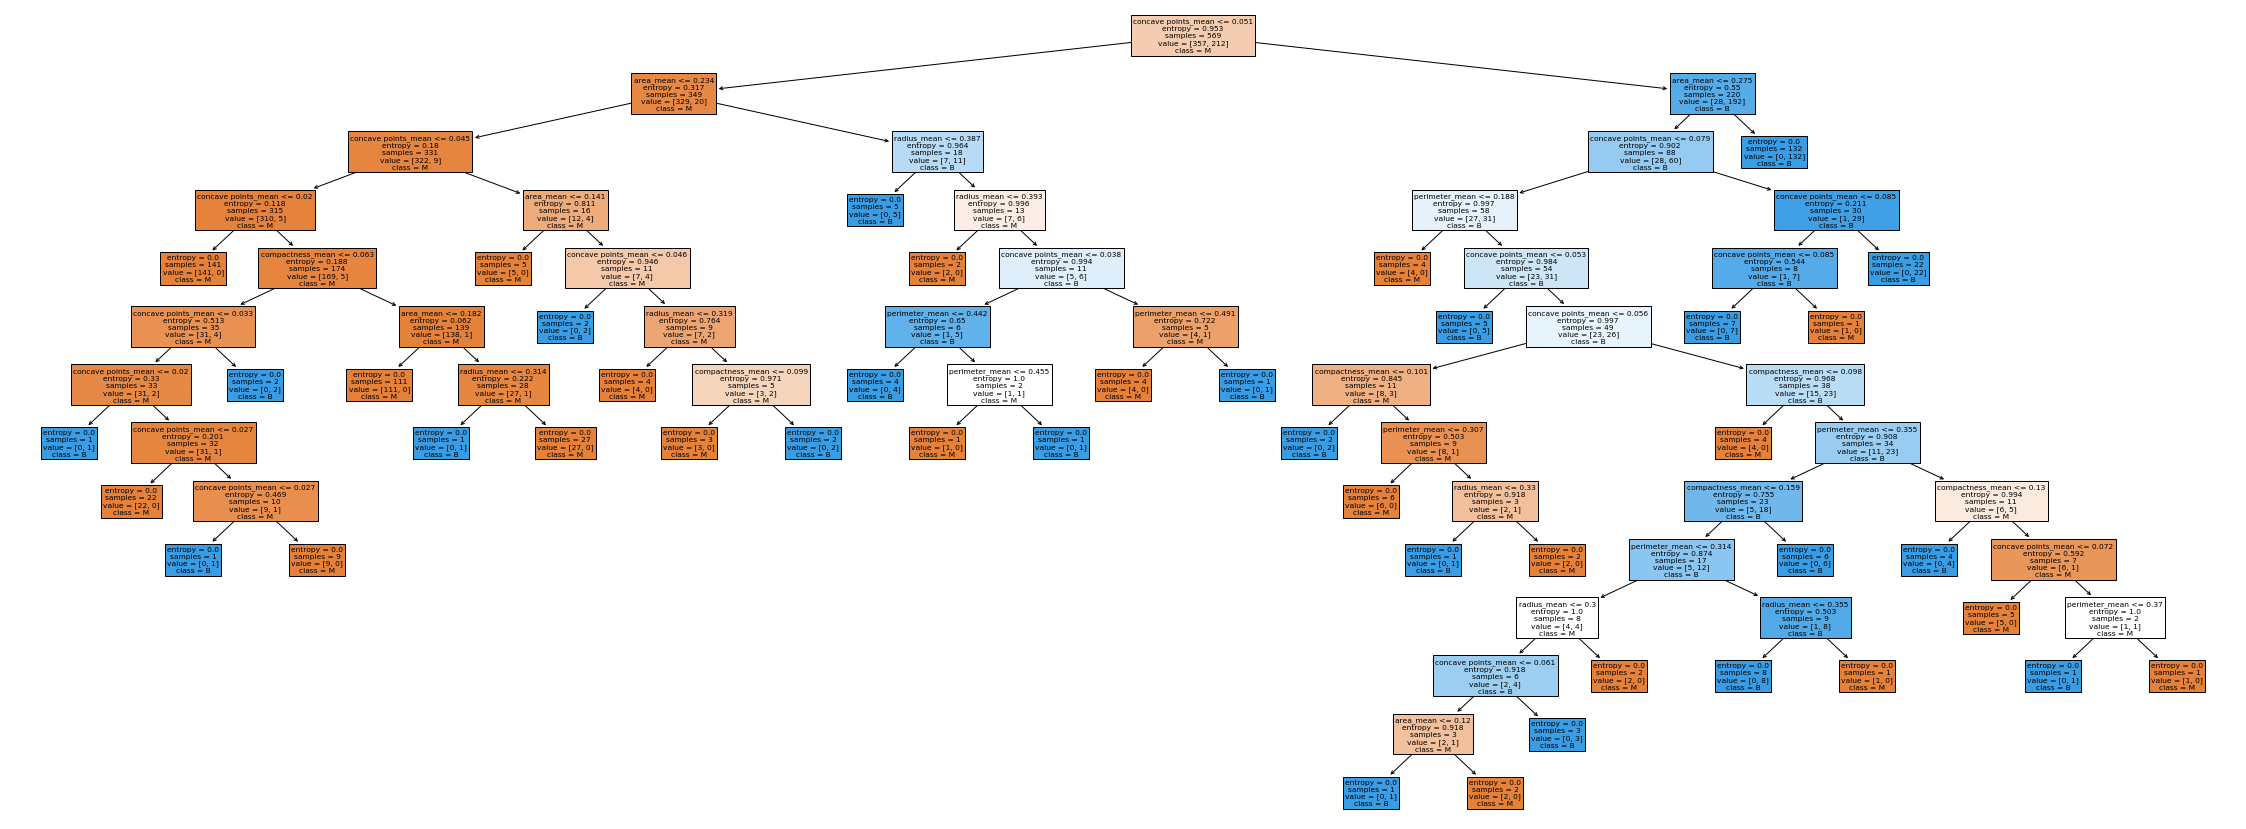

In [0]:
plt.figure(figsize=(40,15))
plot_tree(model, filled=True, class_names=y.unique(), feature_names = X.columns)
plt.show()

<h4><li> Avaliar usando Holdout

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [0]:
model = DecisionTreeClassifier(criterion="entropy", random_state=1)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,115,8
observed_benign,9,56


In [0]:
accuracy_score(y_test, y_test_pred)

0.9095744680851063

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,323,34
observed_benign,32,180


In [0]:
accuracy_score(y, y_pred)

0.8840070298769771

<h2>2 - Segunda combinação

<h4><li> Plotando Árvore de Decisão

In [0]:
model = DecisionTreeClassifier(random_state=1,min_impurity_decrease=0)

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,115,8
observed_benign,8,57


In [0]:
accuracy_score(y_test, y_test_pred)

0.9148936170212766

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,320,37
observed_benign,33,179


In [0]:
accuracy_score(y, y_pred)

0.8769771528998243

<h2>3 - Terceira combinação

<h4><li> Plotando Árvore de Decisão

In [0]:
model = DecisionTreeClassifier(max_depth=3,random_state=1,presort=True)
# max_depth = A profundidade máxima da árvore. Se Nenhum, os nós serão expandidos até que todas as folhas estejam puras.
# presort = axilia no treinamento quando o conjunto de dados é menor

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=1, splitter='best')

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,113,10
observed_benign,9,56


In [0]:
accuracy_score(y_test, y_test_pred)

0.898936170212766

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)


In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,330,27
observed_benign,34,178


In [0]:
accuracy_score(y, y_pred)

0.8927943760984183

<h2>4 - Quarta combinação

<h4><li> Plotando Árvore de Decisão

In [0]:
model = DecisionTreeClassifier(max_leaf_nodes=8)
#max_leaf_nodes = Os melhores nós são definidos como redução relativa na impureza. Se Nenhum, número ilimitado de nós de folha.

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,113,10
observed_benign,10,55


In [0]:
accuracy_score(y_test, y_test_pred)

0.8936170212765957

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,329,28
observed_benign,27,185


In [0]:
accuracy_score(y, y_pred)

0.9033391915641477

<h2>5 - Quinta combinação

<h4><li> Plotando Árvore de Decisão

In [0]:
model = DecisionTreeClassifier(presort=True)
#max_leaf_nodes = Os melhores nós são definidos como redução relativa na impureza. Se Nenhum, número ilimitado de nós de folha.

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=None, splitter='best')

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,115,8
observed_benign,9,56


In [0]:
accuracy_score(y_test, y_test_pred)

0.9095744680851063

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,326,31
observed_benign,32,180


In [0]:
accuracy_score(y, y_pred)

0.8892794376098418

<h2> Analizando os resultados do algoritmo de Árvore de Indução o melhor resultado foi a Quarta combinação, originando uma acurácia de 0.89 no holdout e 0.90 no 10-folds cross-validation

<hr align='center'>

<h1 align='center'> Algoritmo 2: KNN

<h3>Parâmetros:
<li>K = 1,2,3,6,10,20,30
<li>Função de distância = 1 - Manhatan e 2 Euclidiana

<h2>1 - Primeira combinação

In [0]:
model = KNeighborsClassifier(n_neighbors=1)

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,112,11
observed_benign,12,53


In [0]:
accuracy_score(y_test, y_test_pred)

0.8776595744680851

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,328,29
observed_benign,35,177


In [0]:
accuracy_score(y, y_pred)

0.8875219683655536

<h2>2 - Segunda combinação

In [0]:
model = KNeighborsClassifier(n_neighbors=2)

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,117,6
observed_benign,16,49


In [0]:
accuracy_score(y_test, y_test_pred)

0.8829787234042553

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,346,11
observed_benign,53,159


In [0]:
accuracy_score(y, y_pred)

0.8875219683655536

<h2>3 - Terceira combinação

In [0]:
model = KNeighborsClassifier(n_neighbors=3)

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,111,12
observed_benign,11,54


In [0]:
accuracy_score(y_test, y_test_pred)

0.8776595744680851

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,346,11
observed_benign,53,159


In [0]:
accuracy_score(y, y_pred)

0.8875219683655536

<h2>4 - Quarta combinação

In [0]:
model = KNeighborsClassifier(n_neighbors=6)

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,117,6
observed_benign,11,54


In [0]:
accuracy_score(y_test, y_test_pred)

0.9095744680851063

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,346,11
observed_benign,53,159


In [0]:
accuracy_score(y, y_pred)

0.8875219683655536

<h2>5 - Quinta combinação

In [0]:
model = KNeighborsClassifier(n_neighbors=10)

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,116,7
observed_benign,13,52


In [0]:
accuracy_score(y_test, y_test_pred)

0.8936170212765957

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,346,11
observed_benign,53,159


In [0]:
accuracy_score(y, y_pred)

0.8875219683655536

<h2>6 - Sexta combinação

In [0]:
model = KNeighborsClassifier(n_neighbors=20)

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,117,6
observed_benign,13,52


In [0]:
accuracy_score(y_test, y_test_pred)

0.898936170212766

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,346,11
observed_benign,53,159


In [0]:
accuracy_score(y, y_pred)

0.8875219683655536

<h2>7 - Sétima combinação

In [0]:
model = KNeighborsClassifier(n_neighbors=5)

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,117,6
observed_benign,9,56


In [0]:
accuracy_score(y_test, y_test_pred)

0.9202127659574468

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,335,22
observed_benign,27,185


In [0]:
accuracy_score(y, y_pred)

0.9138840070298769

<h2>Analizando os Resulatdos da aplicação do KNN o melhor resultado foi este último, alcançando uma acurácia de 0.92 no holdout e 0.91 no 10-folds cross-validation.

<hr>

<h1 align='center'> Algoritmo 3: SVM

<h3>O SVM possui uma biblioteca em python, então vamos fazer uso dela, ela possui todos os parâmetos necessários de que precisamos<li>Local onde encontrei a biblioteca: https://scikit-learn.org/stable/modules/svm.html e onde encontrei quais são os seus parâmetros: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

<h2> 1 - Primeira combinação (Polinomial)

In [0]:
model = svm.SVC(kernel='poly')

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,123,0
observed_benign,63,2


In [0]:
accuracy_score(y_test, y_test_pred)

0.6648936170212766

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,357,0
observed_benign,195,17


In [0]:
accuracy_score(y, y_pred)

0.6572934973637962

<h2> 2 - Segunda combinação (Linear)

In [0]:
model = svm.SVC(kernel='linear')

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,117,6
observed_benign,16,49


In [0]:
accuracy_score(y_test, y_test_pred)

0.8829787234042553

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,345,12
observed_benign,49,163


In [0]:
accuracy_score(y, y_pred)

0.8927943760984183

<h2> 3 - Terceira combinação (Linear com parâmetro C)

In [0]:
model = svm.SVC(kernel='linear', C=7)

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,113,10
observed_benign,12,53


In [0]:
accuracy_score(y_test, y_test_pred)

0.8829787234042553

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,342,15
observed_benign,39,173


In [0]:
accuracy_score(y, y_pred)

0.9050966608084359

<h2> 4 - Quarta combinação (Polynomial com o parâmetro C)

In [0]:
model = svm.SVC(kernel='poly',C=8)

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,123,0
observed_benign,37,28


In [0]:
accuracy_score(y_test, y_test_pred)

0.8031914893617021

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,356,1
observed_benign,108,104


In [0]:
accuracy_score(y, y_pred)

0.8084358523725835

<h2> 5 - Quinta combinação (Parâmetro C)

In [0]:
model = svm.SVC(C=10)

<h4><li> Avaliar usando Holdout

In [0]:
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_test_pred = model.predict(X_test)

In [0]:
pd.DataFrame( 
    confusion_matrix(y_test, y_test_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,113,10
observed_benign,14,51


In [0]:
accuracy_score(y_test, y_test_pred)

0.8723404255319149

<h4><li>Avaliar usando 10-folds cross-validation:

In [0]:
y_pred = cross_val_predict(model, X, y, cv=10)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [0]:
pd.DataFrame( 
    confusion_matrix(y, y_pred),
    index = ['observed_malignant','observed_benign'],
    columns = ['predicted_malignant','predicted_benign']
    )

,predicted_malignant,predicted_benign
observed_malignant,342,15
observed_benign,40,172


In [0]:
accuracy_score(y, y_pred)

0.9033391915641477

Após a execução de todas as combinações do SVM o melhor resultado foi daterceira configuração a qual resultou em um holdout de 0.88 e um cross-validation de 0.9, isso se deve ao fato de como foi observado que os dados estão bem agrupados o melhor kernel para se usar é o linear com um parâmetro C alto para classificar corretamente os exemplos.